<a href="https://colab.research.google.com/github/JhonnyLimachi/IA_en_Salud/blob/main/6_Arbol_de_desici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Árbol de decisión

*El Árbol de Decisión* es un algoritmo de aprendizaje supervisado para el Aprendizaje Automático, y puede utilizarse tanto para la clasificación como para la regresión.

Un Árbol de Decisión* se construye mediante un proceso de inducción, que divide los datos en subconjuntos cada vez más puros. Para seleccionar los atributos que compondrán el árbol, se tienen en cuenta el grado de entropía de un nodo y la información extra obtenida tras una *división*.

<p align=center>
  <img src="https://www.smartdraw.com/decision-tree/img/structure-of-a-decision-tree.png" width="50%">
</p>



## Árbol de decisión en `scikit-learn

El conjunto de datos que usaremos en este *notebook* ha sido adaptado del conjunto de datos original ***Cleveland Clinic Foundation*** y puede descargarse del [UCI *Machine Learning* Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease). El *enlace* a la versión procesada del *dataset*, que utilizaremos ahora, está disponible para su descarga [en este enlace](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1).

Importemos las bibliotecas necesarias y el conjunto de datos a un *DataFrame*. A continuación, echemos un vistazo a las primeras entradas de este *dataset*.



In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head(10)

Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


Considerando el modelo `DecisionTreeClassifier` (de `sklearn.tree`), vamos a trabajar sobre el mismo paso a paso.

In [2]:
# 1. elegir e importar un modelo
from sklearn.tree import DecisionTreeClassifier

# 2. Instanciar e escolher os hyperparameters
model = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# 3. Separar os dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Veamos cómo ha funcionado el modelo en nuestro conjunto de tests.

Veamos el informe de clasificación y la matriz de confusión

In [3]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        37
           1       0.78      0.79      0.78        39

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



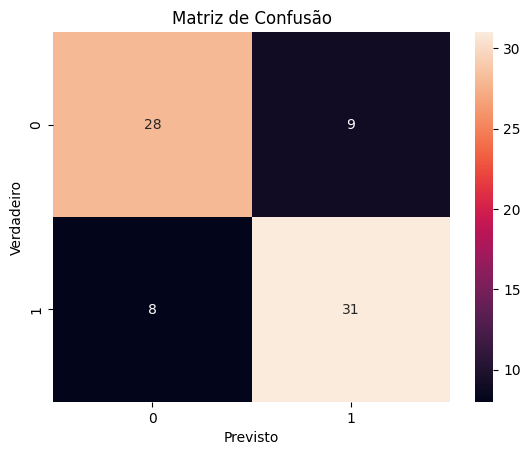

In [4]:
# matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()